### Student Performance Indicator

#### Life Cycle of Machine Learning Project

1. Understanding the problem statement
2. Data collection
3. Data checks to perform
4. Exploratory data analysis
5. Data pre-processing
6. Model Training
7. Choose best model

## 1) Problem Statement
This project understands how the student's performance (test scores) is affected by other variables sucha as Gender, Ethnicity, Parental level of education, Lunch and test preparation course.

## 2) Data Collection

    Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
    
    The data consist of 8 columns and 1000 rows

### 2.1 Import Data and Required Packages

#### Importing Pandas , Numpy, Matplotlib, Seaborn and Warnings library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV data as Pandas Dataframe

In [2]:
df=pd.read_csv('data/Stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information
1. gender: sex of students-> (Male/female) 
2. race/ethnicity: ethnicity of students-> (Group A, B,C, D,E) A 
3. parental level of education: parents' final education->(bachelor's degree, some college, master's degree, associate's degree,high school) 
4. lunch: having lunch before test (standard or free/reduced) 
5. test preparation course: complete or not complete before test 
6. math score 
7. reading score 
8. writing score


### 3 Data checks to perform
1. Check missing values
2. check duplicates
3. check datatype
4. check the number of unique values of each column
5. check statistics of data set
6. check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There is no missing value 

### 3.2 Check duplicates

In [6]:
df.duplicated().sum()

0

#### No duplicates

### 3.3 check datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 check the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 check statistics of data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights
1. From above description of numerical data , all means are clse to each other - between 66 and 68.05;
2. All standard deviations are also close - between 14.6 and 15.19;
3. While there is a minimum score 0 for math , for writing minimum score is much higher = 10 and for reading much higher = 17

### Exploring Data

In [10]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'Lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [11]:
#define numerical and categorical column
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

#print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_feature),categorical_feature))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total Score']/3

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading score']==100]['Average'].count()
writing_full = df[df['writing score']==100]['Average'].count()
math_full = df[df['math score']==100]['Average'].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Reading: {reading_full}")

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
reading_less_20 = df[df['reading score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average'].count()
math_less_20 = df[df['math score'] <= 20]['Average'].count()

print(f"Number of students with less than equal to 20 marks in Maths: {math_less_20}")
print(f"Number of students with less than equal to 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than equal to 20 markss in Reading: {reading_less_20}")

Number of students with less than equal to 20 marks in Maths: 4
Number of students with less than equal to 20 marks in Writing: 3
Number of students with less than equal to 20 markss in Reading: 1


#### Insights
1. From above values we get students have performed the worst in Maths.
2. Best performance is in reading section.

### 4. Exploring Data (Visualization)

### 4.1 Visualize average score distribution to make some conclusion
1. Histogram
2. Kernel distribution Function (KDE)

#### 4.1.1 Histogram and KDE

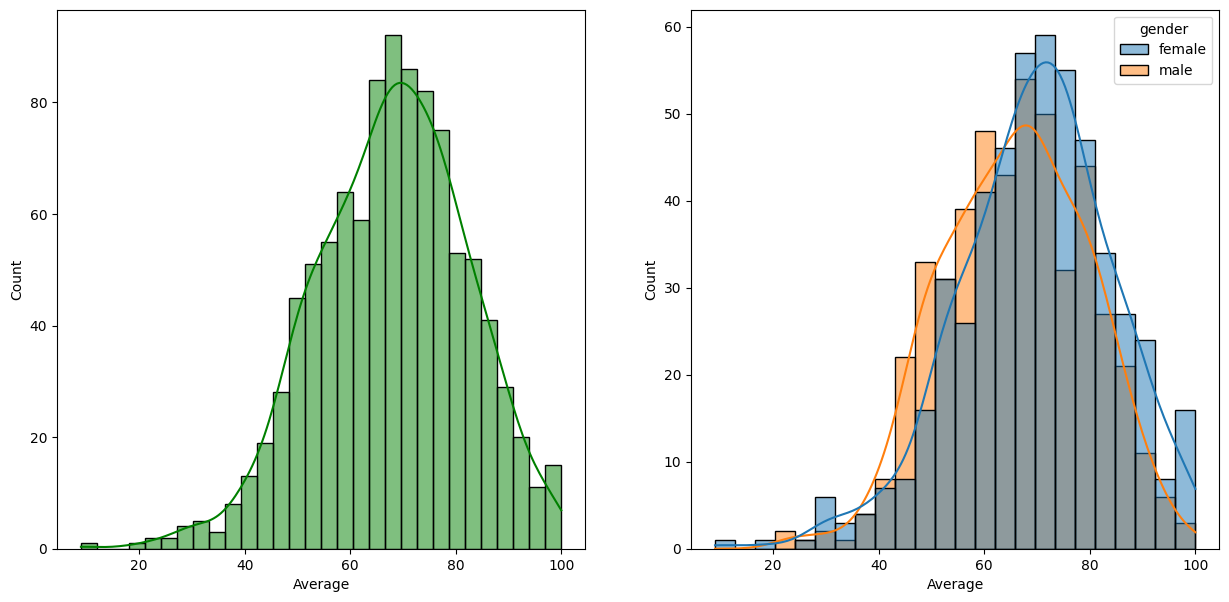

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g',ax=ax[0])
sns.histplot(data=df,x='Average',kde=True,hue='gender',ax=ax[1])
plt.show()

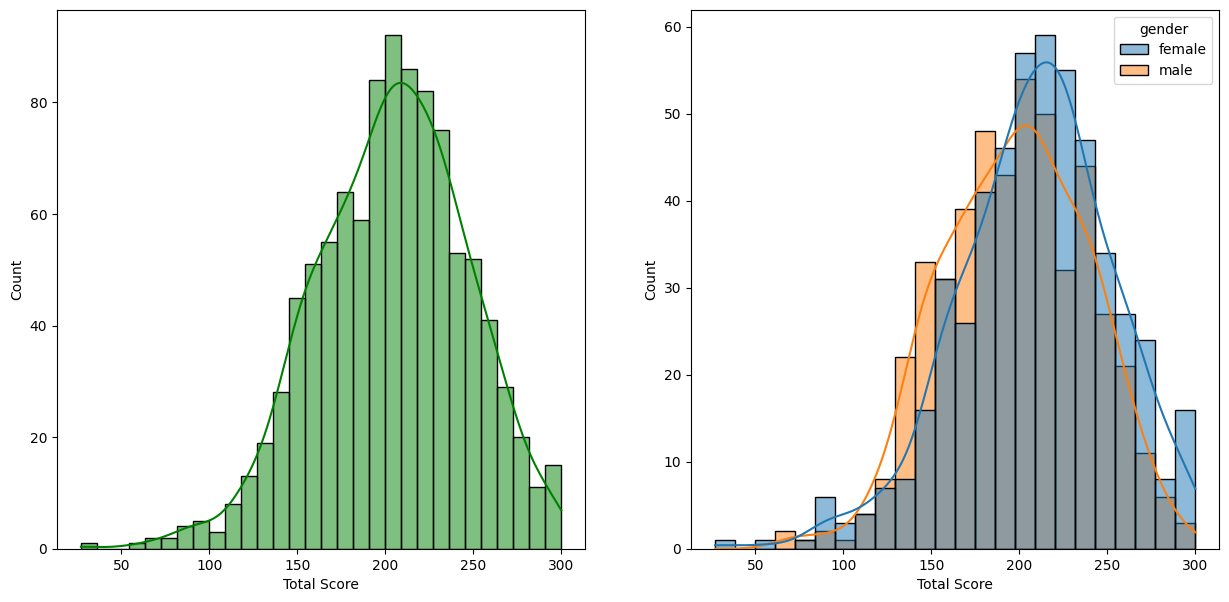

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g',ax=ax[0])
sns.histplot(data=df,x='Total Score',kde=True,hue='gender',ax=ax[1])
plt.show()

#### Insights
1. Female tends to perform well then male students.

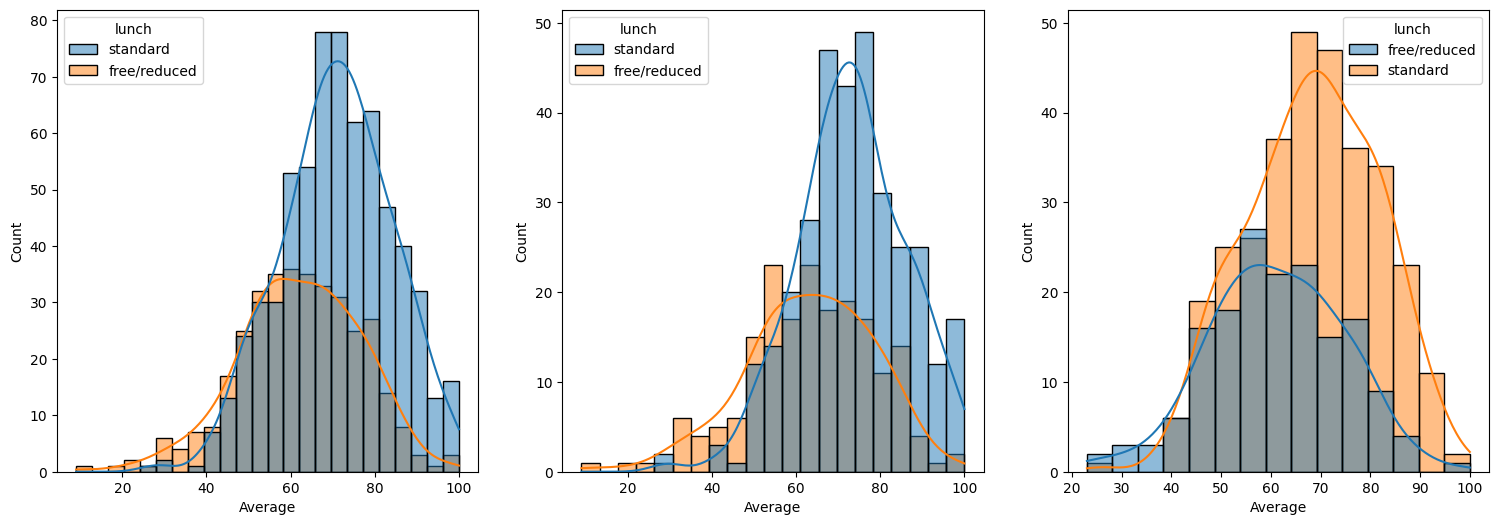

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

#### Insights
1. Standard Lunch helps perform well in exams.
2. Standard lunch helps perform well in exams be it a male or female.

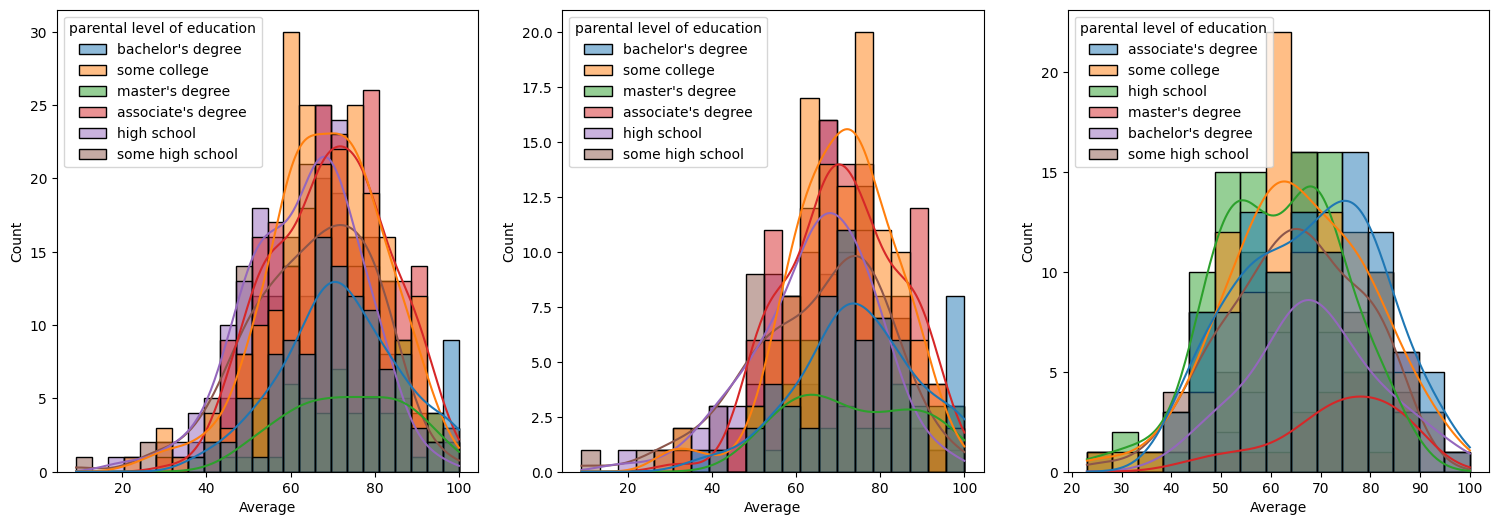

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.show()

#### Insights
1. In general parent's education don't help student perform well in exam.
2. 2nd plot shows that parent's whose education is of associate's degree or master's degree their female child tend to perform well in exam
3. 3rd plot we can see there is no effect of parent's education on male students.

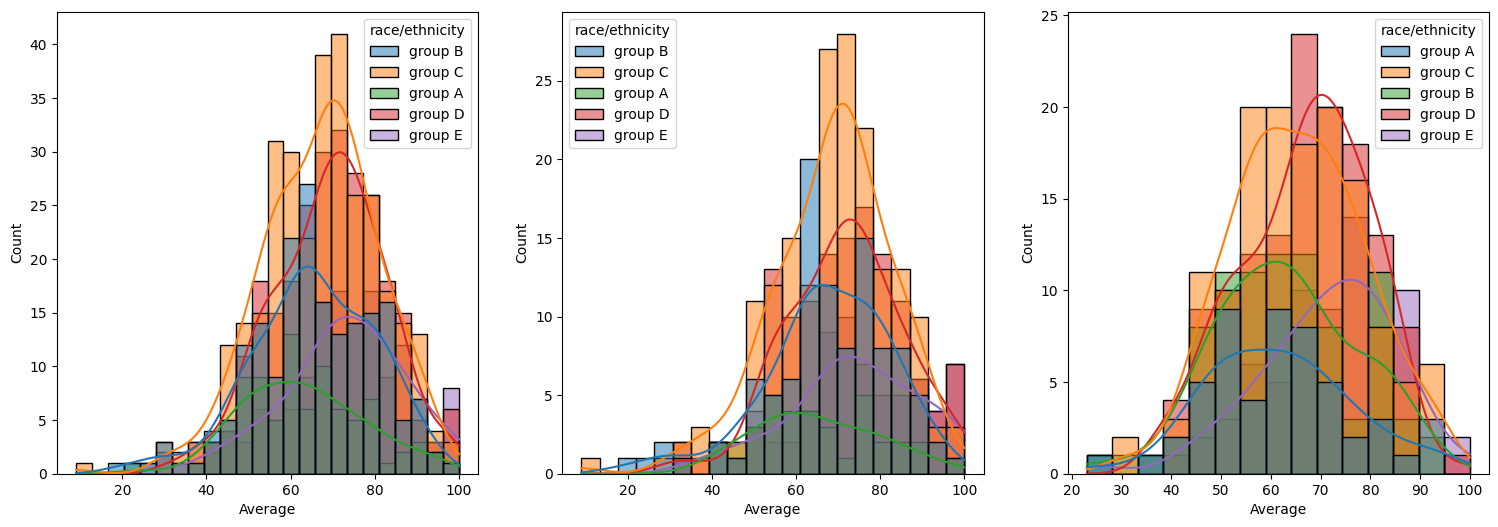

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.show()

#### Insights
1. Students of group A and group B tends to perform poorly in exam.
2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

### 4.2 Maximum score of students in all three subjects

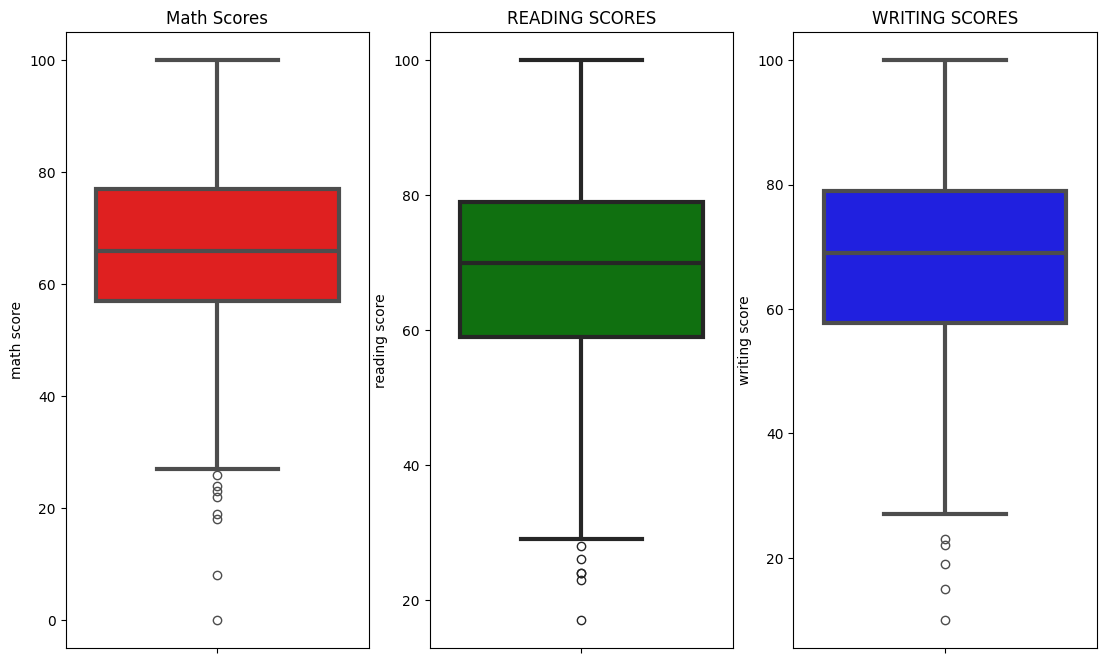

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math Scores")
sns.boxplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.boxplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3  Multivariate analysis using pieplot

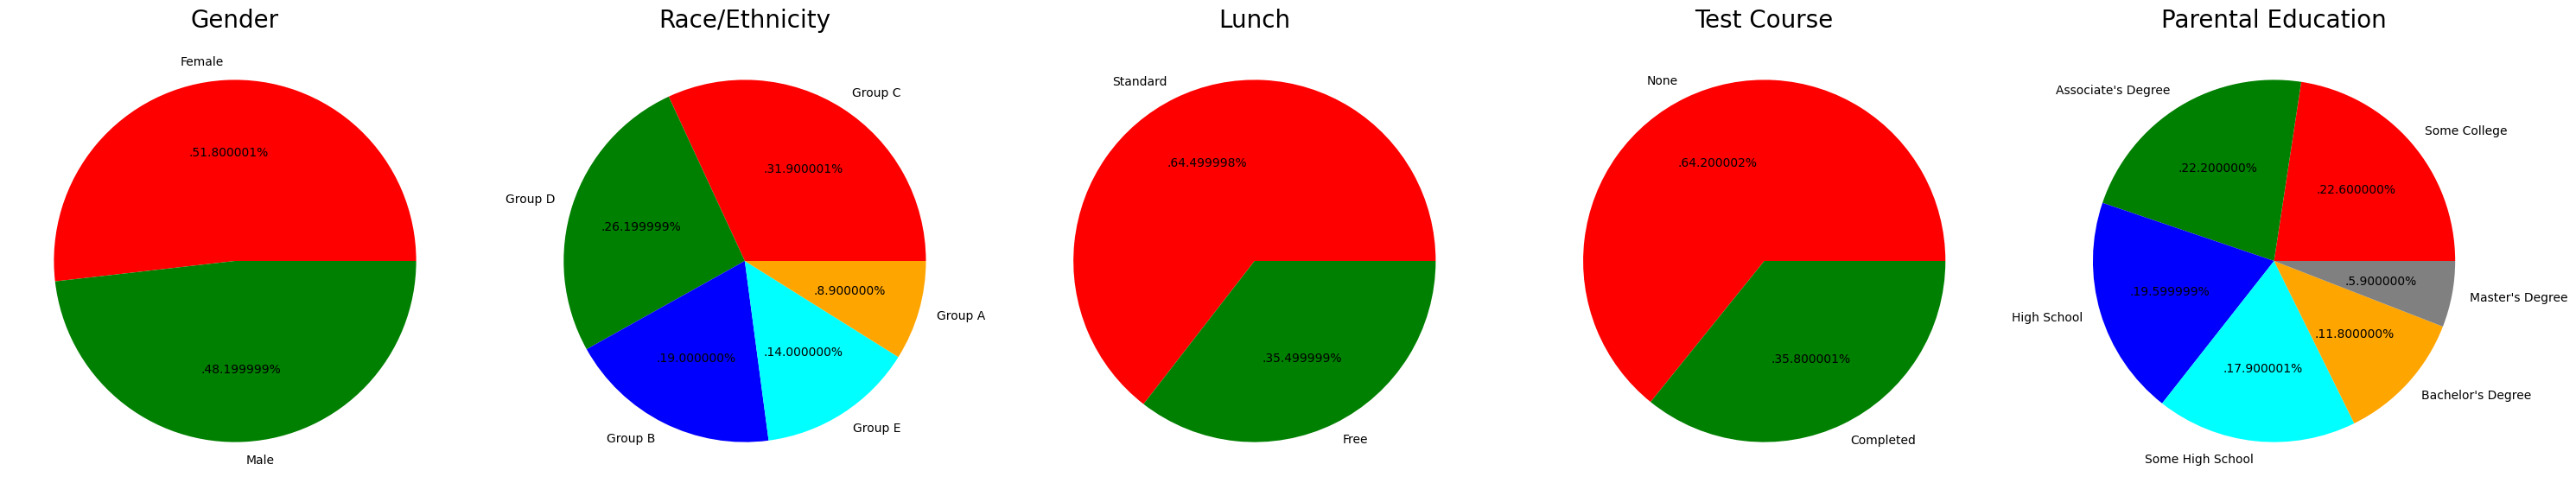

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#### Insights
1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature wise Visualization

### 4.4.1 Gender Column
1. How is distribution of Gender ?
2. Is gender has any impact on student's performance ?

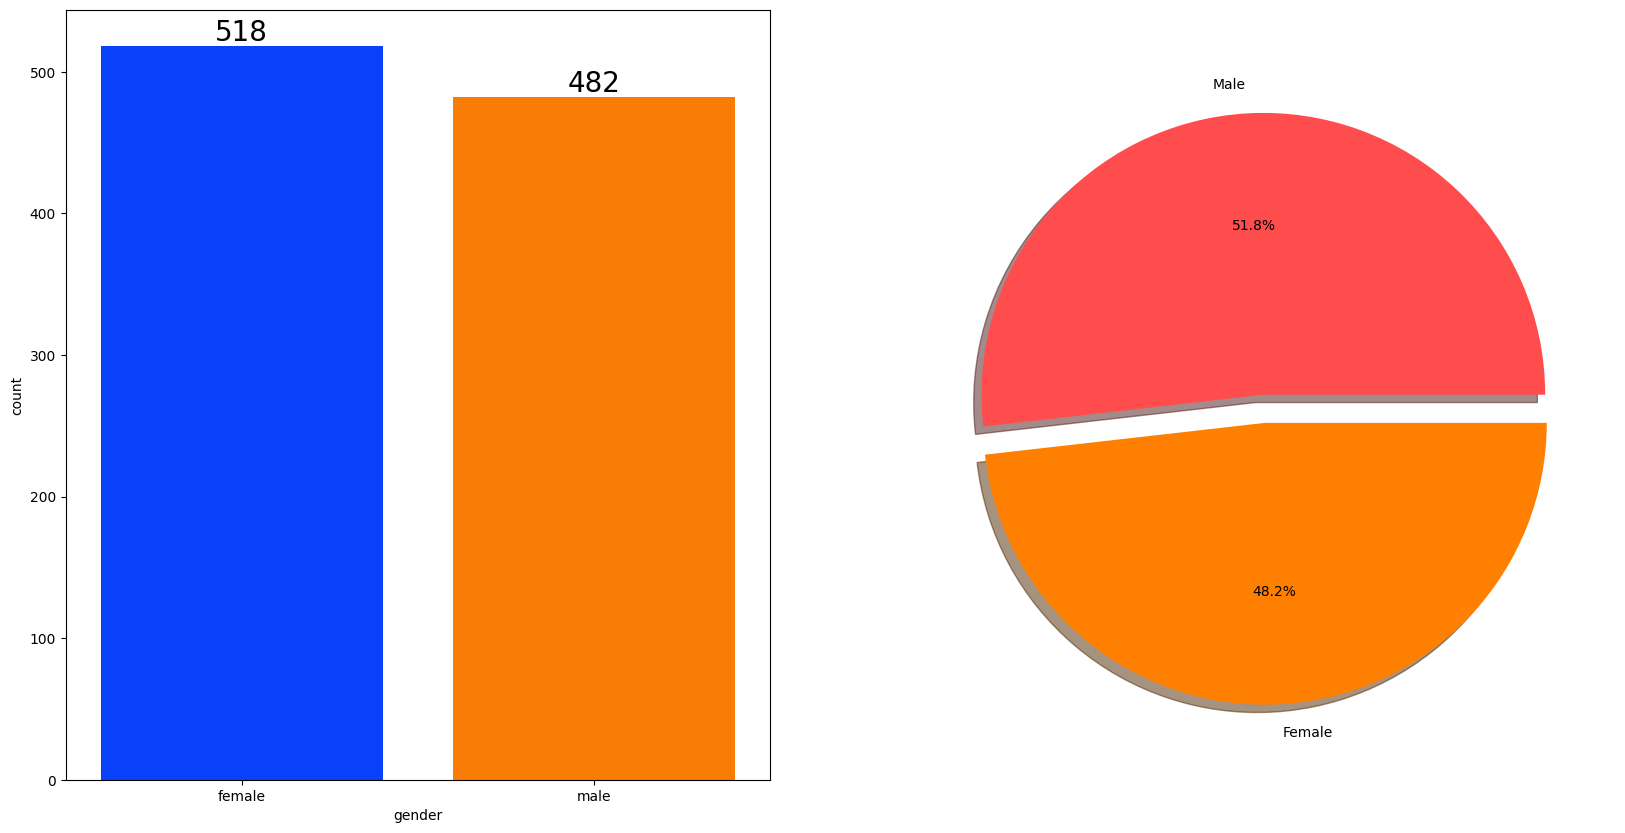

In [30]:
## Univariate analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
Gender has balanced data with female are 518 (48%) and male students are 482 (52%) 

In [32]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [33]:
## Bivariate analysis
gender_grp = df.groupby('gender')[['math score', 'reading score', 'writing score','Total Score', 'Average']].mean()
gender_grp

,math score,reading score,writing score,Total Score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


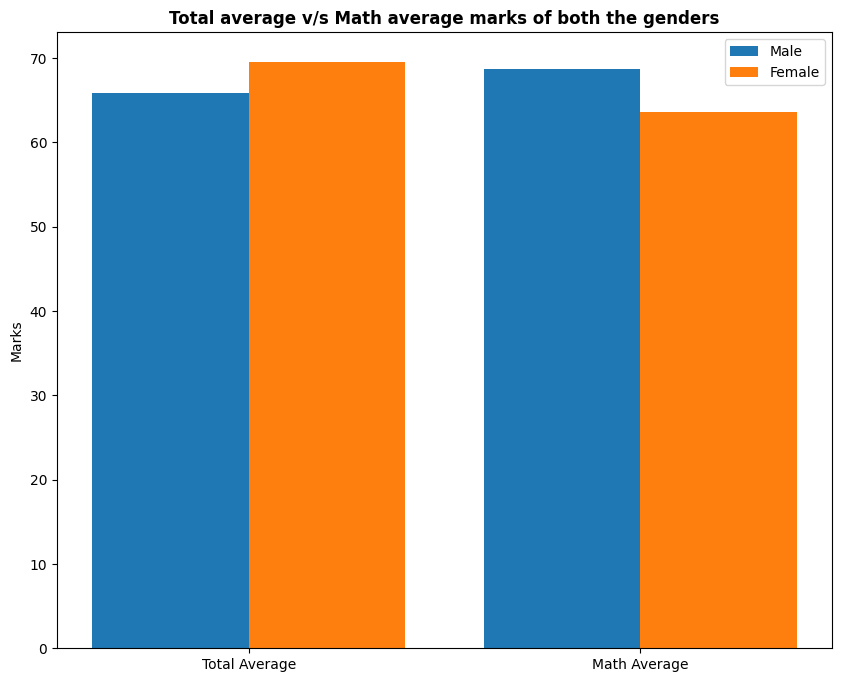

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_grp['Average'][0], gender_grp['math score'][0]]
male_scores = [gender_grp['Average'][1], gender_grp['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
1. On an average females have a better overall score than men.
2. whereas males have scored higher in Maths.

### 4.4.2 RACE/EHNICITY COLUMN
1. How is Group wise distribution ?
2. Is Race/Ehnicity has any impact on student's performance ?

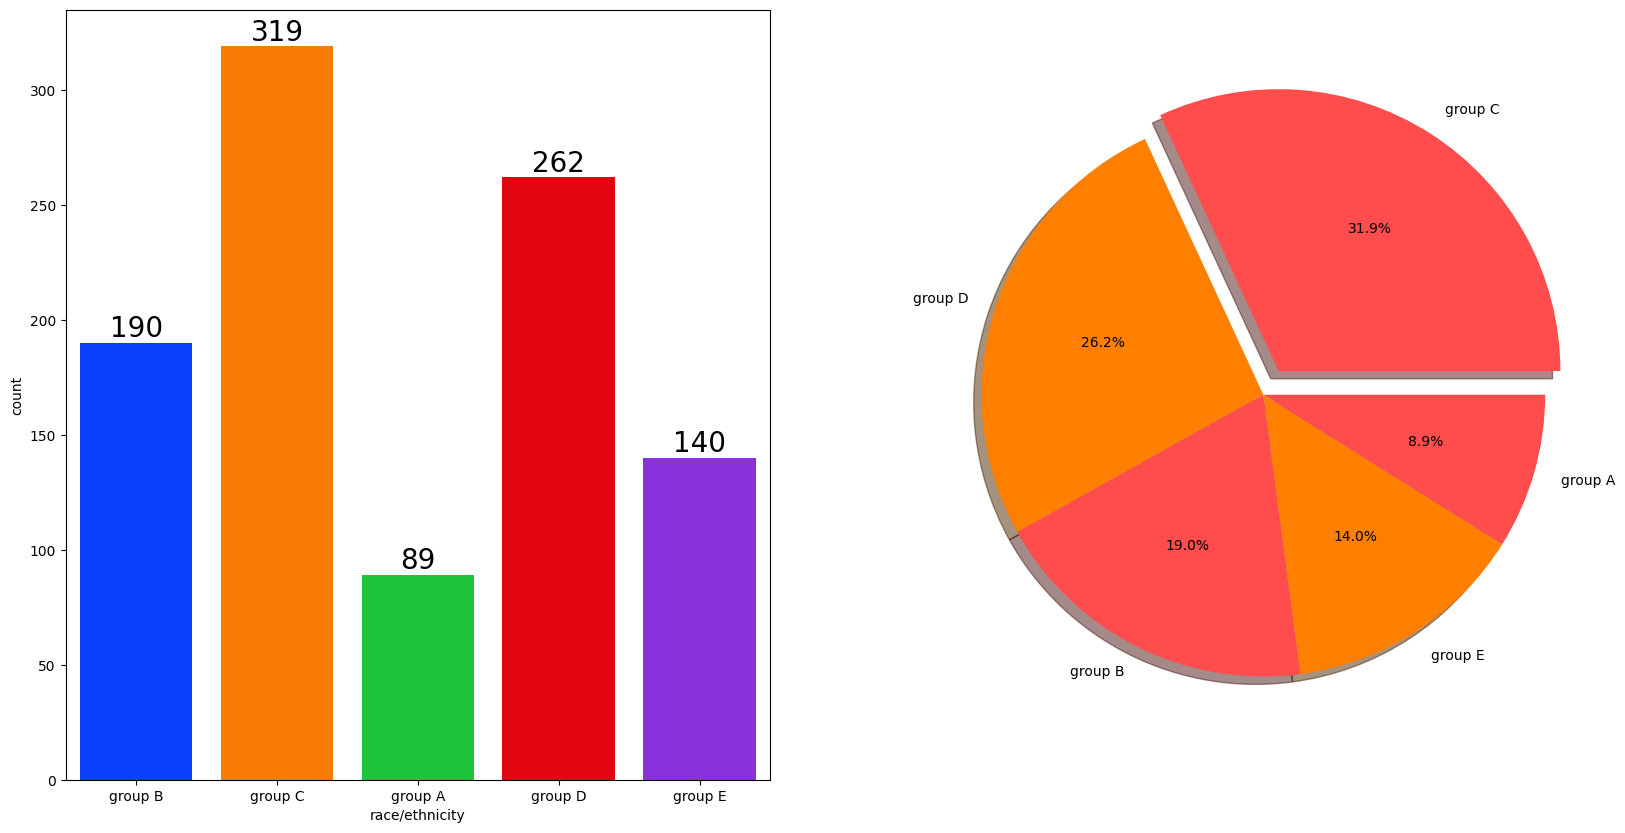

In [36]:
## Univariate analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
1. Most of the student belonging from group C /group D.
2. Lowest number of students belong to groupA.

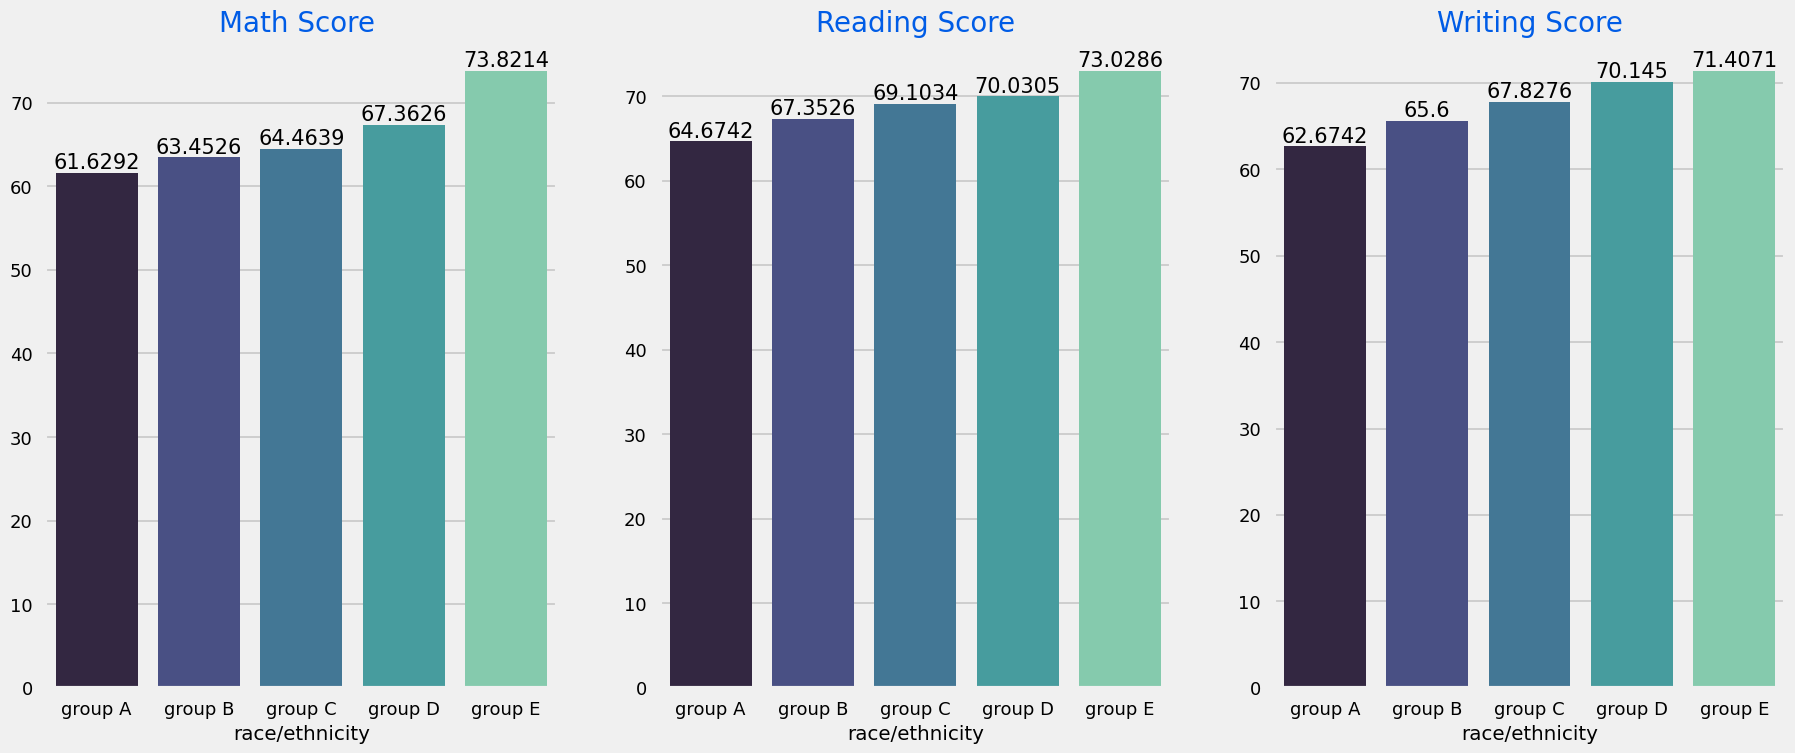

In [59]:
## Bivariate analysis
group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math score'].mean().index,y=group_data2['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score ',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
ax[1].set_title('Reading Score',color='#005ce6',size=20)
sns.barplot(x=group_data2['reading score'].mean().index,y=group_data2['reading score'].mean().values,palette='mako',ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

ax[2].set_title('Writing Score',color='#005ce6',size=20)   
sns.barplot(x=group_data2['writing score'].mean().index,y=group_data2['writing score'].mean().values,palette='mako',ax=ax[2])
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
1. Group E students have scored the highest marks.
2. Group A students have scored the lowest marks.
3. Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
1. What is educational background of student's parent ?
2. Is parental education has any impact on student's performance ? 

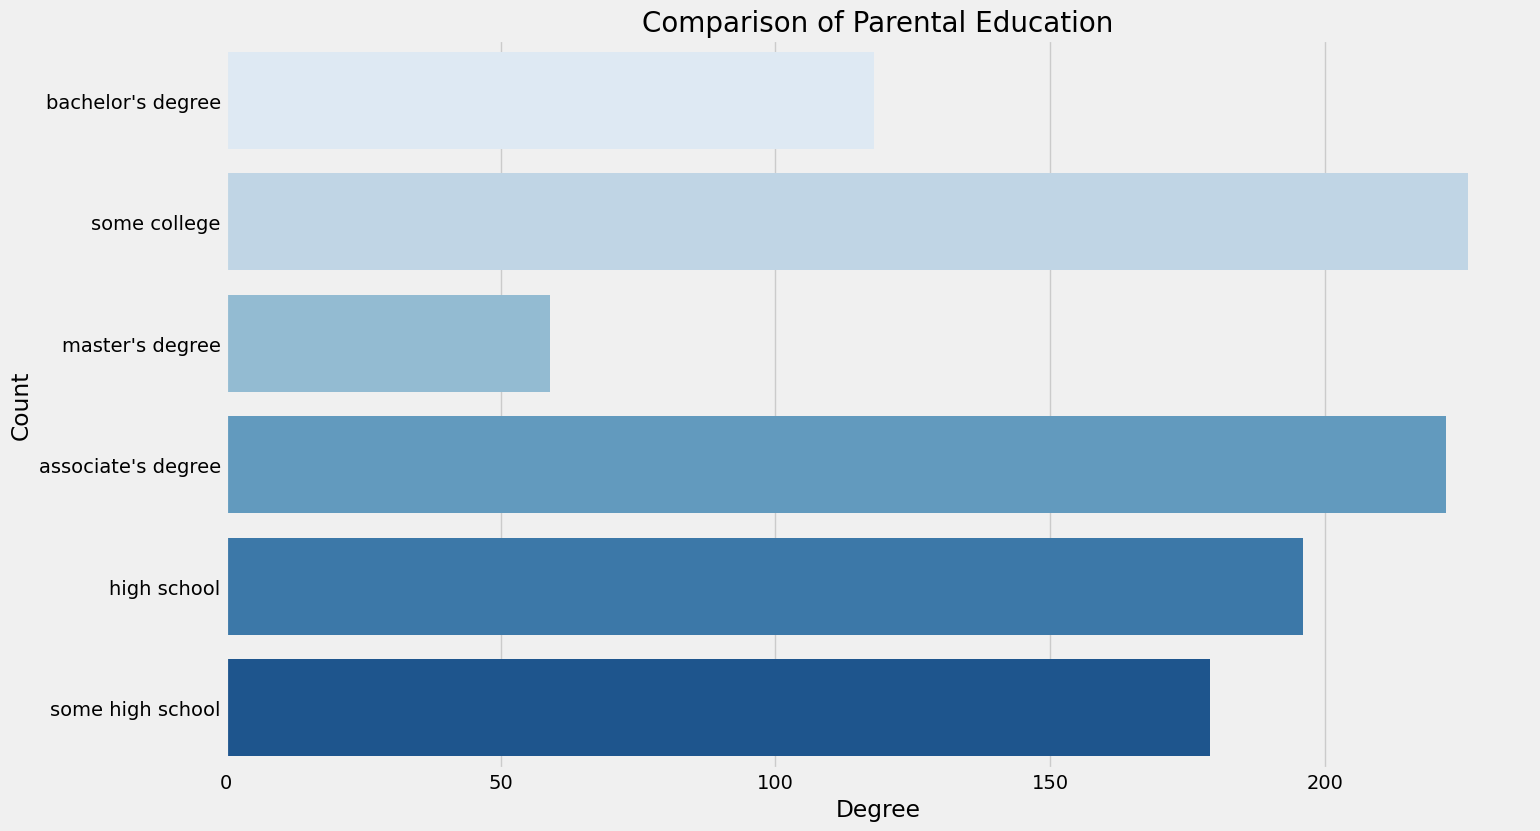

In [48]:
## Univariate analysis
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'],palette='Blues')
plt.title('Comparison of Parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insights
largest number of parents are from some college.

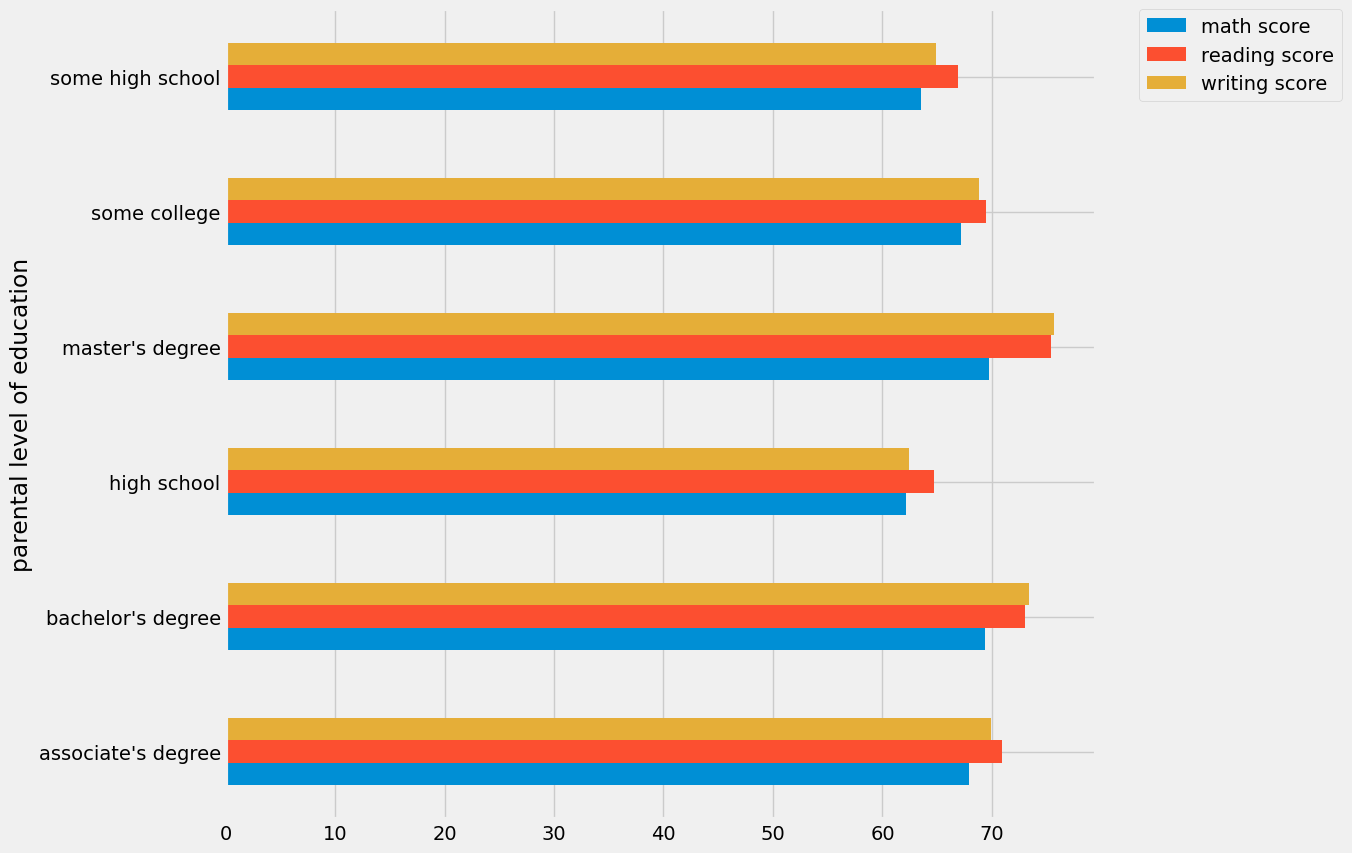

In [50]:
## Bivariate analysis
df.groupby('parental level of education').agg({'math score': 'mean','reading score': 'mean','writing score': 'mean'}).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

#### Insights
The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 Lunch column
1. Which type of lunch is most common amoung students ?
2. What is the effect of lunch type on test results?

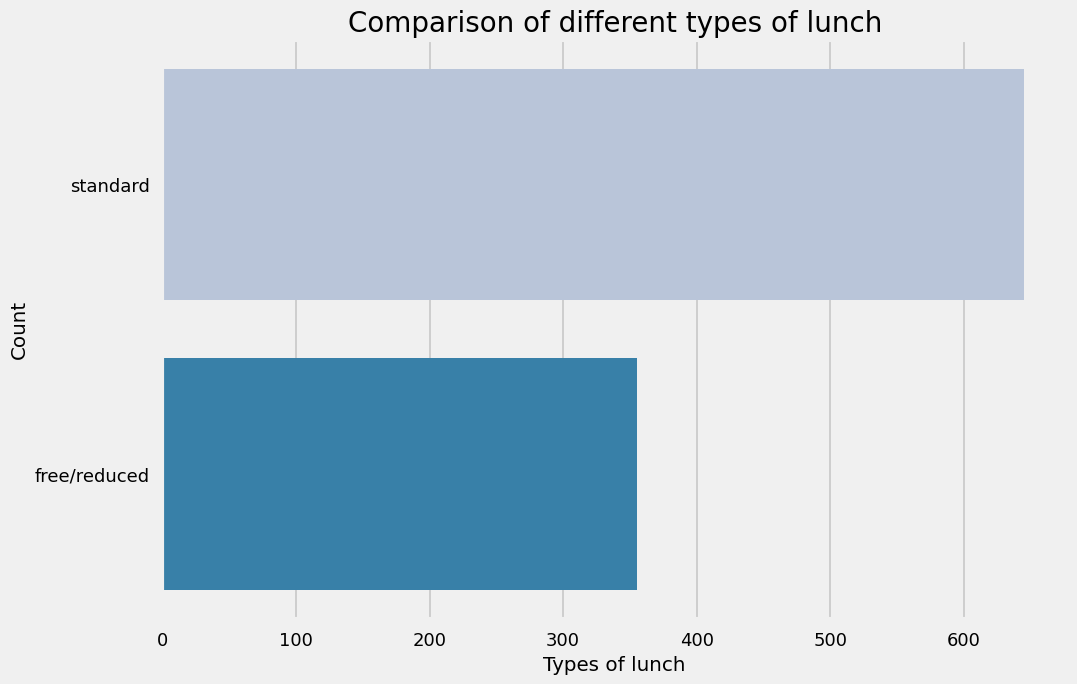

In [51]:
## Univariate analysis
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

#### Insights
Students being served Standard lunch was more than free lunch

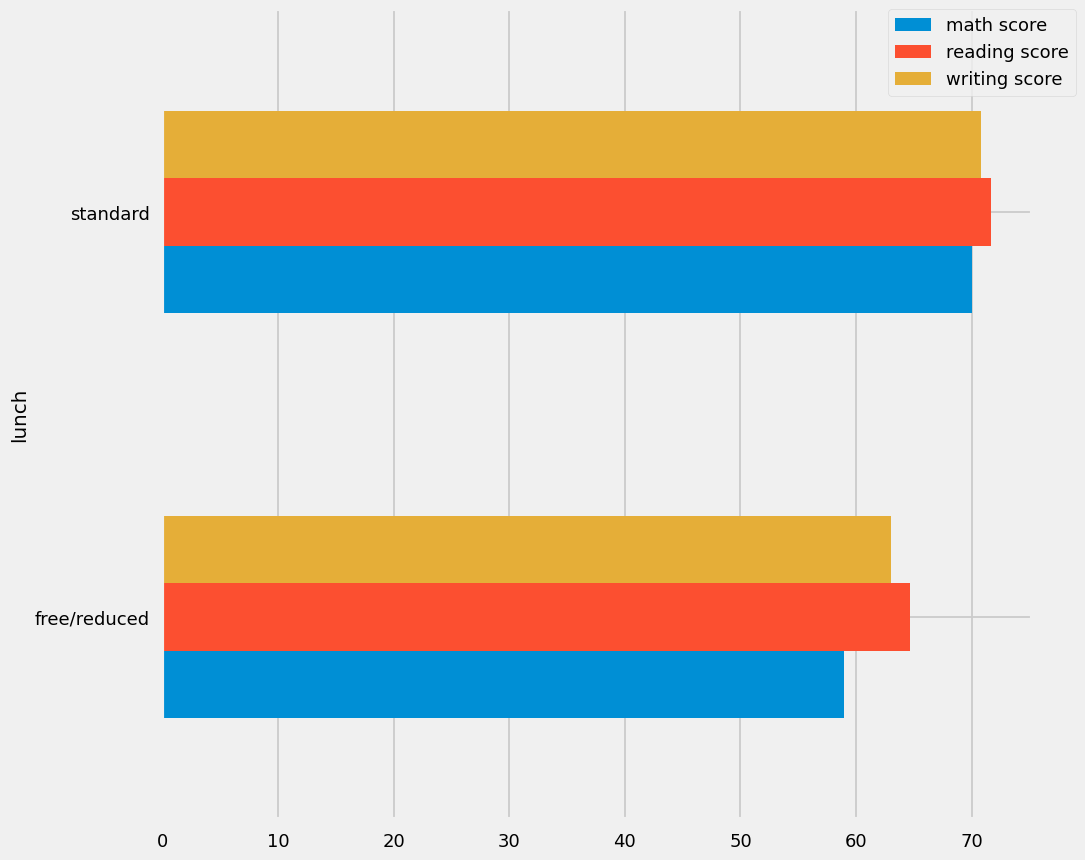

In [52]:
## Bivariate analysis
df.groupby('lunch').agg({'math score':'mean','reading score':'mean','writing score':'mean'}).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),borderaxespad=0.)
plt.show()

#### Insights
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 4.4.5 TEST PREPARATION COURSE COLUMN
1. Is Test prepration course has any impact on student's performance ?

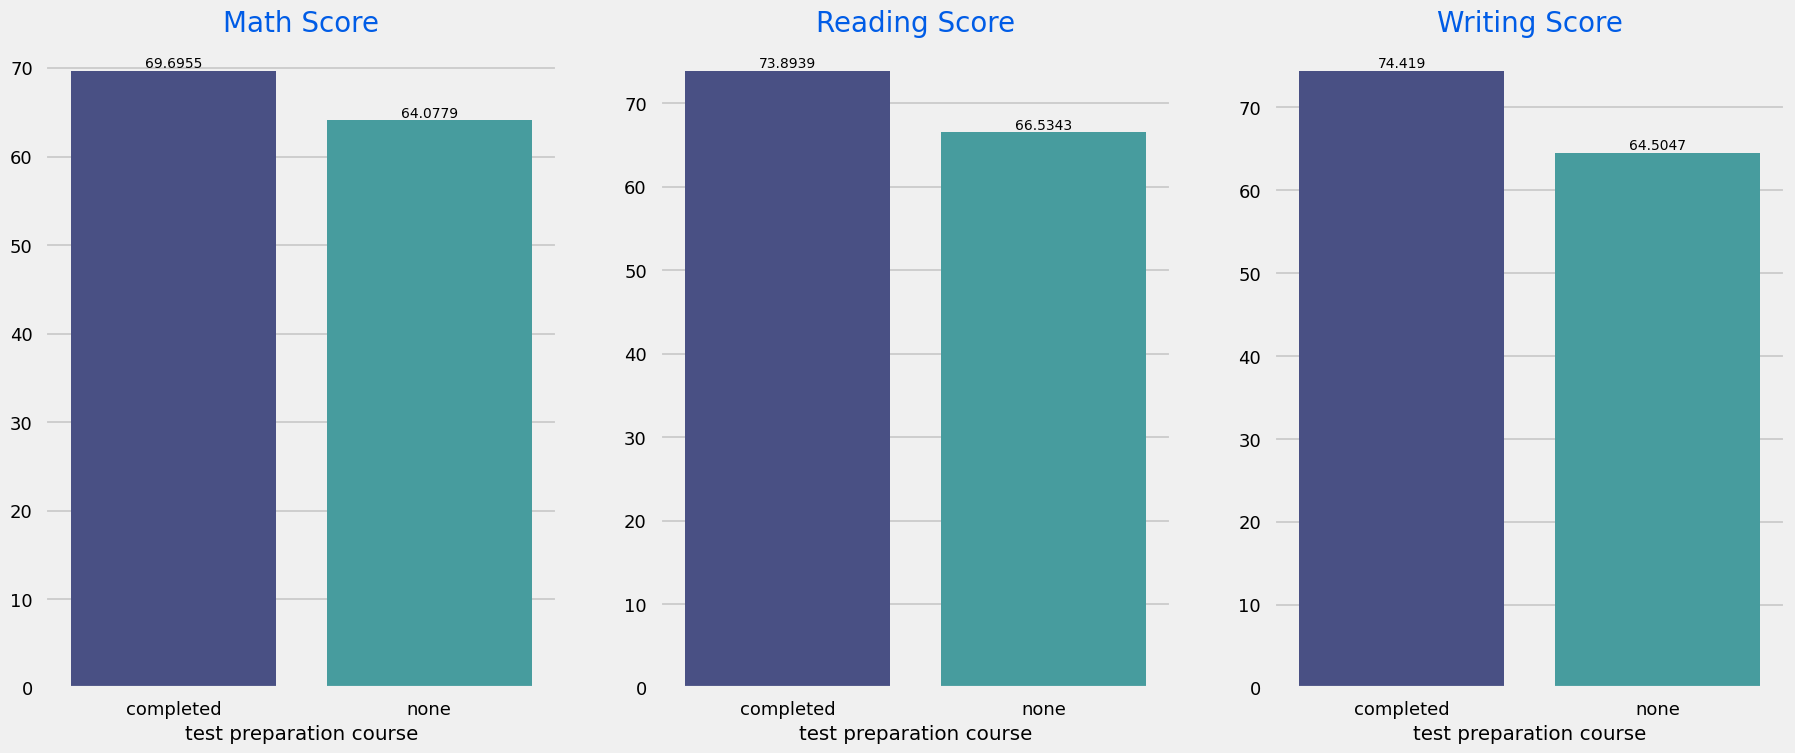

In [60]:
## Bivariate analysis
f,ax=plt.subplots(1,3,figsize=(20,8))
group_data3=df.groupby('test preparation course')
ax[0].set_title('Math Score',color='#005ce6',size=20)
sns.barplot(x=group_data3['math score'].mean().index,y=group_data3['math score'].mean().values,palette='mako',ax=ax[0])
for conatiner in ax[0].containers:
    ax[0].bar_label(conatiner,color='black',size=10)

ax[1].set_title('Reading Score',color='#005ce6',size=20)
sns.barplot(x=group_data3['reading score'].mean().index,y=group_data3['reading score'].mean().values,palette='mako',ax=ax[1])
for conatiner in ax[1].containers:
    ax[1].bar_label(conatiner,color='black',size=10)

ax[2].set_title('Writing Score',color='#005ce6',size=20)    
sns.barplot(x=group_data3['writing score'].mean().index,y=group_data3['writing score'].mean().values,palette='mako',ax=ax[2])
for conatiner in ax[2].containers:
    ax[2].bar_label(conatiner,color='black',size=10)

#### Insights
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 Checking Outliers

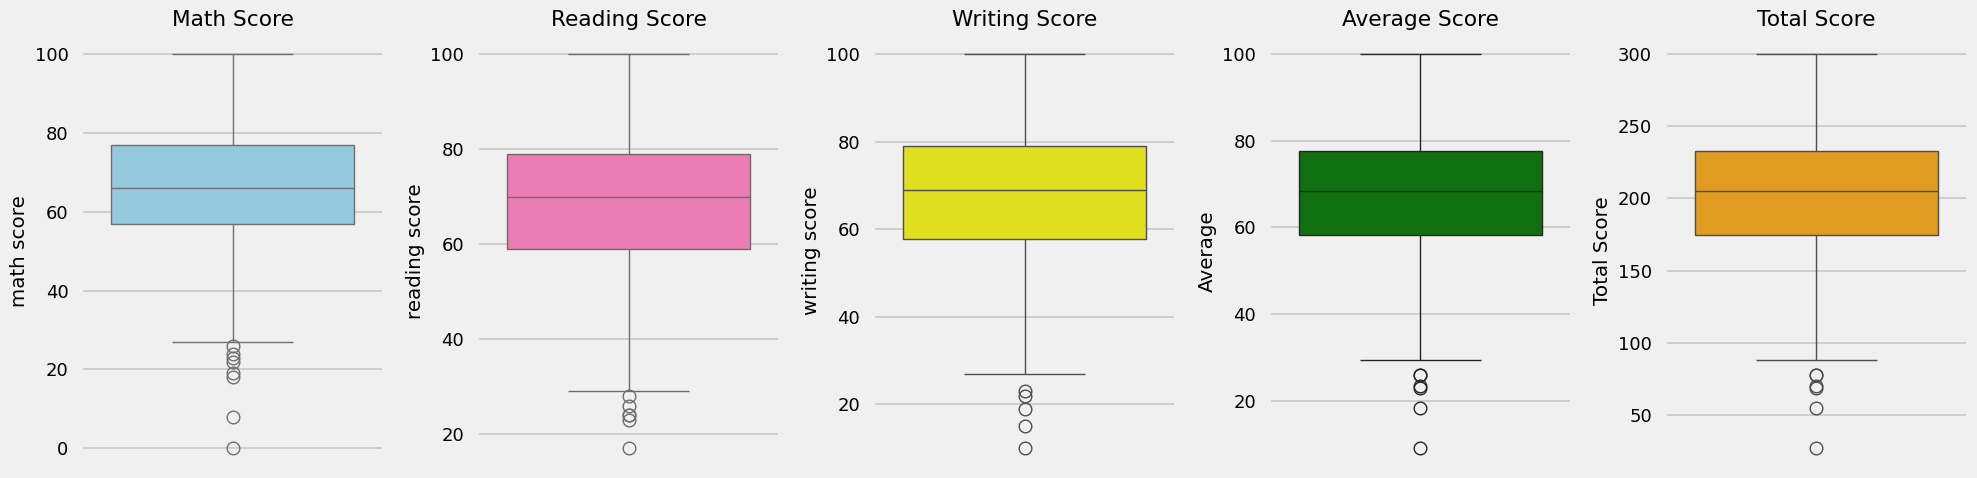

In [64]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # Create 5 subplots

# Box plots for each score category
sns.boxplot(y=df['math score'], color='skyblue', ax=axes[0])
axes[0].set_title('Math Score')

sns.boxplot(y=df['reading score'], color='hotpink', ax=axes[1])
axes[1].set_title('Reading Score')

sns.boxplot(y=df['writing score'], color='yellow', ax=axes[2])
axes[2].set_title('Writing Score')

sns.boxplot(y=df['Average'], color='green', ax=axes[3])
axes[3].set_title('Average Score')

sns.boxplot(y=df['Total Score'], color='orange', ax=axes[4])
axes[4].set_title('Total Score')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


### 4.4.7 Multivariate Analysis using pairplot

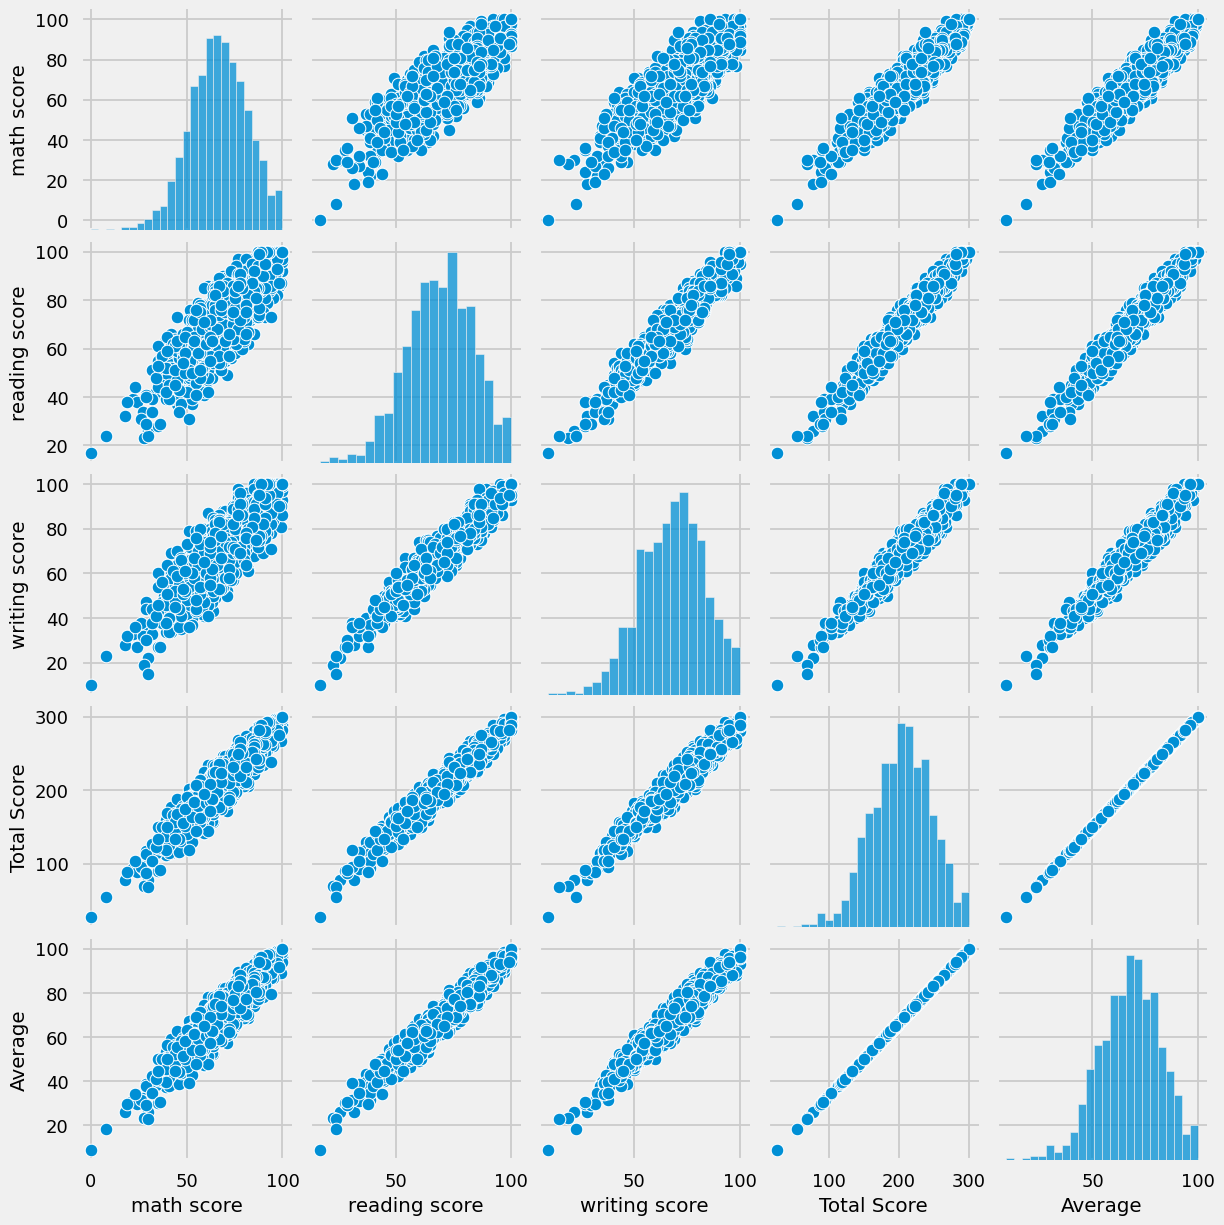

In [68]:
sns.pairplot(data=df)
plt.show()

#### Insights
From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial.